# Day 1. 图像预处理

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
#!pip freeze 

In [3]:
def compare_image(img1,img2,str1,str2):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

    ax1.set_title(str1)
    ax1.set_xticks([]), ax1.set_yticks([])
    ax1.imshow(img1)

    ax2.set_title(str2)
    ax2.set_xticks([]), ax2.set_yticks([])
    ax2.imshow(img2)

    plt.show()

## Image Normalization and Scaling 

Reference:　
+ https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/
+ https://cs231n.github.io/neural-networks-2/
 
For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

### 1. Normalization by Deviding all pixels by 255
This is performed across all channels, regardless of the actual range of pixel values that are present in the image.

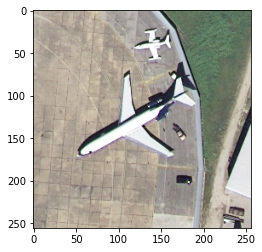

In [4]:
image_path = 'data/UCMerced_LandUse/Images/airplane/airplane20.tif'

image = Image.open(image_path)
pixels_orig = np.asarray(image)
pixels = np.asarray(image)
plt.imshow(pixels)

In [5]:
# confirm pixel range is 0-255
print('Original Data Type: %s' % pixels.dtype)
print('Original Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

# convert from integers to floats
pixels = pixels.astype('float32')

# normalize to the range 0-1
# you code here
pixels /=255

# confirm the normalization
print('\nNew Data Type: %s' % pixels.dtype)
print('New Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Original Data Type: uint8
Original Min: 0.000, Max: 255.000

New Data Type: float32
New Min: 0.000, Max: 1.000


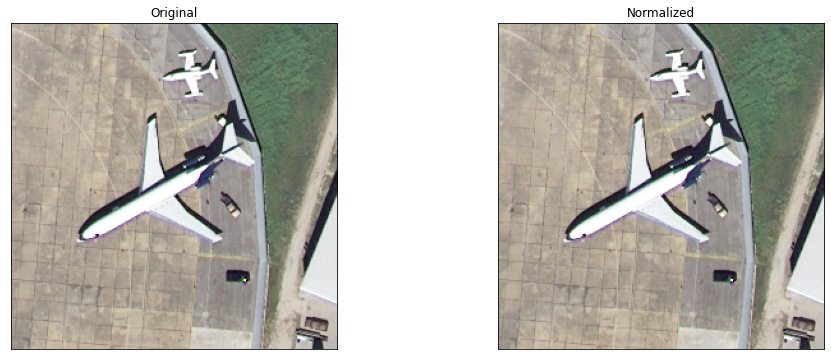

In [6]:
compare_image(pixels_orig, pixels,"Original", "Normalized")

### 2. Mean Subtraction
This approach is called centering, as the distribution of the pixel values is centered on the value of zero.

There are multiple ways that the mean can be calculated; for example:

+ Per image.
+ Per mini-batch of images (under stochastic gradient descent).
+ Per training dataset.

The mean can be calculated for all pixels in the image, referred to as a global centering, or it can be calculated for each 
channel in the case of color images, referred to as local centering.

+ Global Centering: Calculating and subtracting the mean pixel value across color channels.
+ Local Centering: Calculating and subtracting the mean pixel value per color channel.

In some cases, per-channel means are pre-calculated across an entire training dataset. In this case, the image means must be stored and used both during training and any inference with the trained models in the future. For example, the per-channel pixel means calculated for the ImageNet training dataset are as follows:

ImageNet Training Dataset Means: [0.485, 0.456, 0.406]

Global Centering example:

In [7]:
image = Image.open(image_path)
pixels = np.asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean
mean = pixels.mean()

print("Before centering:")
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

# global centering of pixels
pixels -= mean

# confirm it had the desired effect
mean = pixels.mean()
print("\nAfter centering:")
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Before centering:
Mean: 154.657
Min: 0.000, Max: 255.000

After centering:
Mean: -0.000
Min: -154.657, Max: 100.343


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


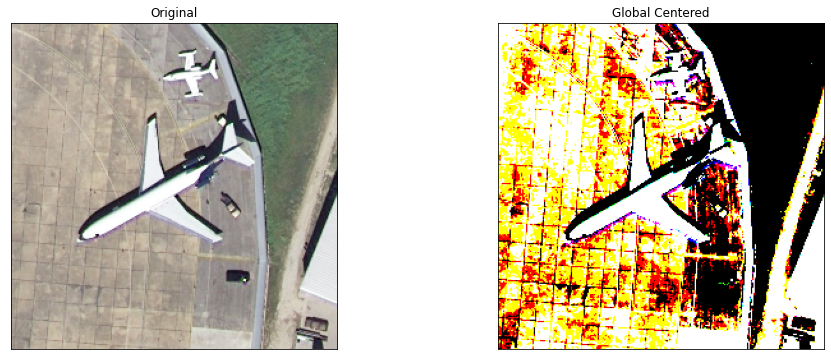

In [8]:
compare_image(pixels_orig,pixels,"Original", "Global Centered")

Global Centering after Normalization:

In [9]:
image = Image.open(image_path)
pixels_orig = np.asarray(image)
pixels = np.asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')

# Normalization
pixels /= 255.0

# calculate global mean
mean = pixels.mean()
print("Before centering:")
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

# global centering of pixels
pixels -= mean

# confirm it had the desired effect
mean = pixels.mean()
print("\nAfter centering:")
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Before centering:
Mean: 0.606
Min: 0.000, Max: 1.000

After centering:
Mean: 0.000
Min: -0.606, Max: 0.394


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


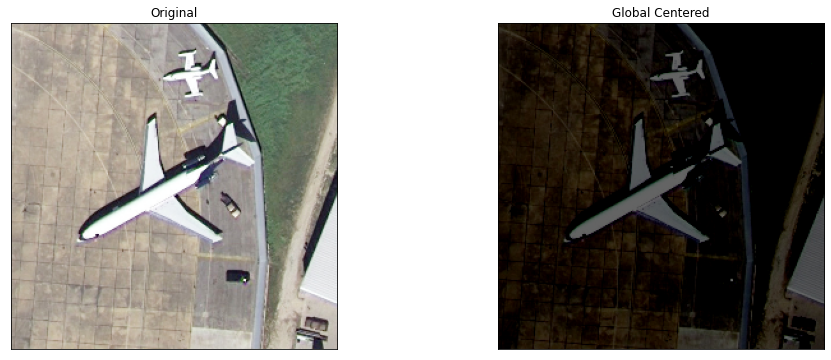

In [10]:
compare_image(pixels_orig,pixels,"Original", "Global Centered")

Local Centering example:

In [11]:
image = Image.open(image_path)
pixels_orig = np.asarray(image)
pixels = np.asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')

# calculate per-channel means and standard deviations
means = pixels.mean(axis=(0,1), dtype='float64')

print("Before centering:")
print('Means: %s' % means)
print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))

# per-channel centering of pixels
pixels -= means
# confirm it had the desired effect

means = pixels.mean(axis=(0,1), dtype='float64')

print("\nAfter centering:")
print('Means: %s' % means)
print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))

Before centering:
Means: [160.7598877  157.0644989  146.14755249]
Mins: [0. 0. 0.], Maxs: [255. 255. 255.]

After centering:
Means: [0. 0. 0.]
Mins: [-160.75989 -157.0645  -146.14755], Maxs: [ 94.24011  97.9355  108.85245]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


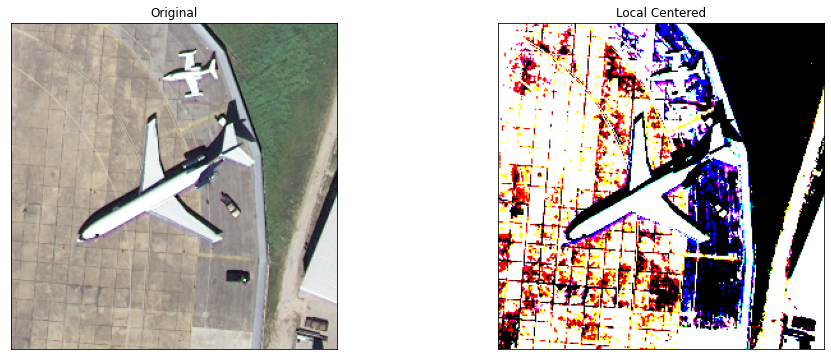

In [12]:
compare_image(pixels_orig,pixels,"Original", "Local Centered")

### 3. Standardization

Transform the distribution of pixel values to be a standard Gaussian: that is both centering the pixel values on zero and normalizing the values by the standard deviation. The result is a standard Gaussian of pixel values with a mean of 0.0 and a standard deviation of 1.0.

#### Global Standardization
The example below calculates the mean and standard deviation across all color channels in the loaded image, then uses these values to standardize the pixel values.

In [13]:
# load image
image = Image.open(image_path)
pixels_orig = np.asarray(image)
pixels = np.asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')

# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()

print('Original Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

# global standardization of pixels
pixels = (pixels-mean)/std

# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('New Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

Original Mean: 154.657, Standard Deviation: 43.507
New Mean: -0.000, Standard Deviation: 1.000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


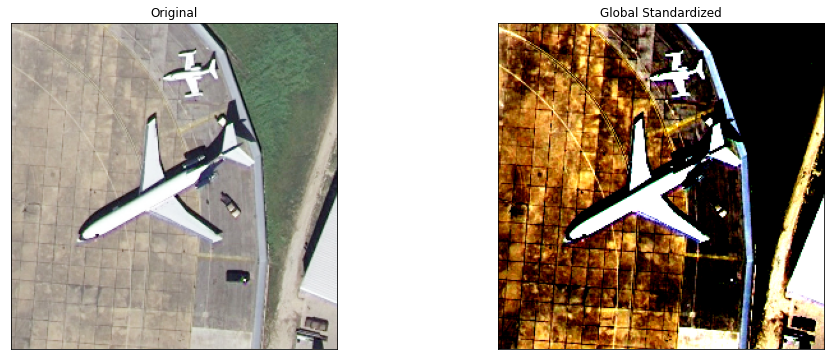

In [14]:
compare_image(pixels_orig,pixels,"Original", "Global Standardized")

Local standardization

In [15]:
# load image
image = Image.open(image_path)
pixels = np.asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean and standard deviation

means = pixels.mean(axis=(0,1), dtype='float64')
stds = pixels.std(axis=(0,1), dtype='float64')

print("Before centering:")
print('Means: %s' % means)
print('Stds: %s' % stds)
print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))

# per-channel standardization of pixels
pixels = (pixels - means) / stds

# confirm it had the desired effect
means = pixels.mean(axis=(0,1), dtype='float64')
stds = pixels.std(axis=(0,1), dtype='float64')
print("\nAfter centering:")
print('Means: %s' % means)
print('Stds: %s' % stds)
print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))

Before centering:
Means: [160.7598877  157.0644989  146.14755249]
Stds: [45.98363728 41.0869403  41.95756879]
Mins: [0. 0. 0.], Maxs: [255. 255. 255.]

After centering:
Means: [4.40547596e-15 5.78221959e-16 1.95016800e-15]
Stds: [1. 1. 1.]
Mins: [-3.49602374 -3.82273534 -3.48322262], Maxs: [2.0494271  2.38361631 2.59434592]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


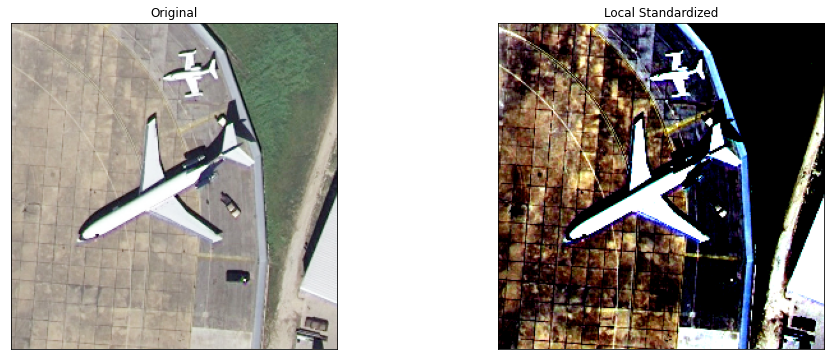

In [16]:
compare_image(pixels_orig,pixels,"Original", "Local Standardized")

###### Common pitfall.

An important point to make about the preprocessing is that any preprocessing statistics (e.g. the data mean) must only be computed on the training data, and then applied to the validation / test data. E.g. computing the mean and subtracting it from every image across the entire dataset and then splitting the data into train/val/test splits would be a mistake. Instead, the mean must be computed only over the training data and then subtracted equally from all splits (train/val/test).

## Normalize, Center, and Standardize Image Pixels in Keras

Traditionally, the images would have to be scaled prior to the development of the model and stored in memory or on disk in the scaled format.

An alternative approach is to scale the images using a preferred scaling technique just-in-time during the training or model evaluation process. Keras supports this type of data preparation for image data via the ImageDataGenerator class and API.

Reference: https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/